# **651 PROJECT: Multilevel Discrete Time Survival Analysis of TBI Outcomes**

*A retrospective study of Traumatic Brain Injury patients (dataset found in Kaggle) utilizing methods from* Regression Methods in Biostatistics *by Vittinghoff, et al. Chapters 6 through 9. Now this dataset is going to be interesting to perform survival analysis on because time is not a continuous variable, rather there are 3 discrete times: $t_0$ (patient is brought to the hospital, $t_1$ (3 months after TBI), $t_2$ (6-9 months after TBI). I will fit different models to the data to determine which factors determine change from entry diagnosis t0, midterm diagnosis $t_1$, and exit diagnosis $t_2$.*

**by Casey Grage**

## **Introduction**

A significant obstacle in Traumatic Brain Injury research and clinical care is determining which early prognoses can best predict clinical outcome. Doing so can help improve clinical care for the patient. Many studies have utilized regression techniques as well as Support Vector Machine, Naïve Bayes, and Random Forest to identify these factors with age, diagnosis, and severity level (measured with Coma Recovery Scale-Revised) as primary predictors, although these analyses are rarely used in clinical practice to date.

These studies have high variability, so Roberta Bruschetta and his team at the Institute for Biomedical Research and Innovation (IRIB) compared the following models for the prediction of clinical outcomes of TI patients:

* Classical Linear Regression Model
* Minimum Redundancy Maximum Relevance algorithm
* Chi-square Test
* Support Vector Machine
* Naïve Bayes
* k-Nearest Neighbors
* Decision Tree
* Ensemble of the four above ML methods

Bruschetta and team used both 2 and 4 classes of outcome approaches with 4 classes being "Good Recovery, Moderate Disability, Severe Disability, and Vegetative/Death", and 2 classes being "positive vs. negative outcomes". Ultimtely they found that the machine learning algorithms do not perform better than more traditional regression models in predicting the outcome after TBI.

I now would like to perform an extension of this research and test survival analysis models. This is not a simple survival analysis model because time is not a continuous variable! Rather it is discrete and represents 3 different events: $t_0$ in which the TBI occurs, $t_1$ at 3 months post TBI, and $t_2$ at 6-9 months post TBI.

**Discrete Time Survival Analysis Explained**

Discrete time survival analysis is used to model survival variables $T$ that take only integer values $1,2, \ldots, L$. If $C$ is a censoring indicator, then if $T_{i}=t$ and $C_{i}=1$, individual $i$ survived until time $t$ but was not observed beyond that point. if $T_{i}=t$ and $C_{i}=0$, individual $i$ died at time $t$.

The data used for the analysis is represented by binary indicators $U_{i j}$ where $i=1, \ldots, N$ and $j=1, \ldots, L(N$ is the sample size)
$$
U_{i j}=\left\{\begin{array}{l}
1 \text { if } T_{i}>j \text { or } T_{i}=j, C_{i}=1 \\
0 \text { if } T_{i}=j, C_{i}=0 \\
* \text { if } T_{i}<j
\end{array}\right.
$$
where $*$ represents the missing value symbol. The interpretation of $U_{i j}$ is that when the binary indicator is 1 , individual $i$ survived period $j$; when it is 0 , individual $i$ died in period $j ;$ and when it is missing, individual $i$ was not observed in period $j$. A basic survival model that estimates the survival probabilities in each period is then given by the equation
$$
P\left(U_{i j}=1\right)=\frac{1}{1+\operatorname{Exp}\left(\tau_{j}\right)}
$$
If we add a covariate $X$ to this model, we can estimate the discrete time survival model where the effect of $X$ varies with time
$$
P\left(U_{i j}=1\right)=\frac{1}{1+\operatorname{Exp}\left(\tau_{j}-\beta_{j} X_{i}\right)}
$$

**Multilevel Discrete Time Survival Analysis Explained**

When individuals are grouped in clusters, we can estimate the following multilevel discrete time survival analysis
$$
P\left(U_{i j k}=1\right)=\frac{1}{1+\operatorname{Exp}\left(\tau_{j}-f_{k}-\beta_{j} X_{i k}\right)}
$$
where $U_{i j k}$ is the binary indicator for individual $i$ in cluster $k$ for period $j$ and $f_{k}$ is a cluster-specific frailty random effect. Such a model can be specified in Mplus as in Figure 1. The loadings on the between level can be freed as well. This will create a time-specific effect for the cluster-specific frailty $f_{k}$
$$
P\left(U_{i j k}=1\right)=\frac{1}{1+\operatorname{Exp}\left(\tau_{j}-\lambda_{j} f_{k}-\beta_{j} X_{i k}\right)} .
$$
Furthermore, the parameters $\tau_{j}$ can be estimated as cluster specific random parameters. To obtain such a model the variances of $U_{1}, \ldots, U_{4}$ would be estimated on the between level.

## **Import Libraries**

Importing pycox and rpy2 to use both the pycox and R included coxph functions.

In [1]:
! pip install pycox
! pip install sklearn-pandas
! pip install torchtuples
! pip install lifelines
! pip install matplotlib==3.1.3

from lifelines import KaplanMeierFitter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.7/73.7 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 42.0 MB/s eta 0:00:00
  Created wheel for feather-format: filename=feather_format-0.4.1-py3-none-any.whl size=2436 sha256=af28517840fb4e59dd1b2e8ccdffcdd50b0215210ab859dd87a021be58ed232e
  Stored in directory: /root/.cache/pip/wheels/a6/ff/5d/4f10de26fe5dd

In [2]:
%load_ext rpy2.ipython

#! apt-get install r-base

#! pip install rpy2 --upgrade

In [3]:
import numpy as np
import pandas as pd

from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import pylab as plt

# For preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper

import torch # For building the networks
import torchtuples as tt # Some useful functions

from pycox.models import LogisticHazard
from pycox.models import PMF
from pycox.models import DeepHitSingle
from pycox.evaluation import EvalSurv
from pycox.models import MTLR

pd.options.mode.chained_assignment = None

ImportError: ignored

In [4]:
%matplotlib inline
import codecs
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from scipy import stats as ss
import csv

from collections import Counter
from collections import defaultdict

import seaborn as sns
from scipy import stats
from dateutil import *
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf
import re
import sys

## FILES TO IMPORT FOR LIFE TABLE ANALYSIS
import lifelines
kmf = lifelines.KaplanMeierFitter()
naf = lifelines.NelsonAalenFitter()

## **Load & Adjust Dataset**

I have found a dataset of TBI patients which details their entry diagnosis and exit diagnosis among other factors. The dataset comes from:

*Bruschetta R, Tartarisco G, Lucca LF, Leto E, Ursino M, Tonin P, Pioggia G, Cerasa A. Predicting Outcome of Traumatic Brain Injury: Is Machine Learning the Best Way? Biomedicines. 2022; 10(3):686. https://doi.org/10.3390/biomedicines10030686*


The following Traumatic Brain Injury Dataset contains 102 anonymized patients collected at S'anna Institute Crotone Italy during clinical assessment on admission (T0), after three months (T1) and after 6-9 months at discharge (T2).
The 18 features extracted are:

* **Subject ID** `Subject`
* **Age** `Age`
* **Sex** `Sex`
* **Marshall classification** `Marshall (t0)`
> The Marshall system places patients into one of six categories (I to VI) of increasing severity on the basis of findings on non-contrast CT scan of the brain. Higher categories have worse prognosis and survival. It is primarily concerned with two features:
degree of swelling, as determined by
midline shift and/or
compression of basal cisterns presence and size of contusions/hemorrhages referred to "high or mixed density lesions"

* **Entry Diagnosis** `Entry Diagnosis (t0)`
> The three possible entry diagnoses in descending order of severity are:
> * "VS": Vegetative State
> * "MCS": Minimally Conscious State
> * "Emersion": Waking from MCS
* **Coma Recovery Scale-Revised** `CRS-R (t1)` `CRS-R (t2)`
> The CRS-R consists of 23 items, grouped into 6 sub-scales: Auditory, Visual, Motor, Oromotor, Communication, Arousal.
> The lowest score on each sub-scale represents reflexive activity; the highest represents behaviors mediated by cognitive input. The total score ranges between 0 (worst) and 23 (best). This measure takes a minimum of 25 minutes to complete.
* **Rancho Los Amigos Levels of Cognitive Functioning Scale**`RLAS (t1)` `RLAS (t2)`
> The RLAS originally had 8 levels, while the revision added levels 9 and 10 to better reflect the highest levels of recovery. The original levels and the revised levels of the RLAS-R levels were dichotomized into two categories: Inferior functioning (RLAS-R 1–8) and Superior functioning (RLAS-R 9-10). The lower the number the lower the apparent cognitive functioning.
* **Disability Rating Scale** `DRS (t1)` `DRS (t2)`
> The DRS has 8 areas of functioning components:
Eye Opening,
Best Communication Ability,
Best Motor Response,
Cognitive Ability for Feeding,
Cognitive Ability for Toileting,
Cognitive Ability for Grooming,
Level of Functioning,
Employability. The maximum score an individual can obtain on the DRS is 29 (extreme vegetative state). A person without a head injury or disability would score zero.
* **Early Rehabilitation Barthel Index  A** `ERBI A (t1)` `ERBI A (t2)`
> Lower is more severe with a range of -325 to 0.
* **Early Rehabilitation Barthel Index B** `ERBI B (t1)` `ERBI B (t2)`
> The original Index is a three-item ordinal rating scale completed by a therapist or other observer in 2-5 minutes. Each item is rated in terms of whether the patient can perform the task (such as bowel movement) independently, with some assistance, or is dependent on help based on observation (0=unable, 1=needs help, 2=independent). The final score is \times 5 to get a  number on a 100 point score. Proposed guidelines for interpreting Barthel scores are that scores of 0-20 indicate “total” dependency, 21-60 indicate “severe” dependency, 61-90 indicate “moderate” dependency, and 91-99 indicates “slight” dependency. Most studies apply the 60/61 cutting point. Lower number is more severe.
* **Glasgow Outcome Scale** `GOS-E (t1)` `GOS-E (t2)`
> The Glasgow Coma Scale analyzes patients on three different criteria: Eye Opening, Motor Response, Verbal Response. And the measurements are:
> * Severe: GCS 3-8
> * Moderate: GCS 9-12
> * Mild: GCS 13-15
* **Diagnosis at Discharge** `Diagnosis at Discharge (t2)`
> Same as entry diagnosis but with added severe category of death.

In [5]:
# Mount Google Drive account as an available drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [6]:
#get all data

mydata = pd.read_excel(r"/content/gdrive/My Drive/JHU Math/Colab Notebooks/Models for Healthcare/Dataset_TBI.xlsx", sheet_name='Foglio1')

print(mydata.shape)

(102, 18)


In [7]:
display(mydata.dtypes)

Subject                         object
Age                              int64
Sex                             object
Marshall (t0)                   object
Entry Diagnosis (t0)            object
CRS-R (t1)                     float64
RLAS (t1)                        int64
DRS (t1)                         int64
ERBI A (t1)                      int64
ERBI B (t1)                      int64
GOS-E (t1)                       int64
Diagnosis at Discharge (t2)     object
CRS-R (t2)                     float64
RLAS (t2)                      float64
DRS (t2)                       float64
ERBI A (t2)                    float64
ERBI B (t2)                    float64
GOS-E (t2)                       int64
dtype: object

In [8]:
display(mydata)

,Subject,Age,Sex,Marshall (t0),Entry Diagnosis (t0),CRS-R (t1),RLAS (t1),DRS (t1),ERBI A (t1),ERBI B (t1),GOS-E (t1),Diagnosis at Discharge (t2),CRS-R (t2),RLAS (t2),DRS (t2),ERBI A (t2),ERBI B (t2),GOS-E (t2)
0,S1,76,M,V,MCS,10.0,3,18,-175,0,3,DEATH,NaN,NaN,30.0,NaN,NaN,1
1,S2,28,M,III,MCS,8.0,3,20,-125,0,2,EMERSION,23.0,7.0,8.0,0.0,60.0,4
2,S3,20,F,II,MCS,9.0,3,18,-175,0,2,EMERSION,23.0,7.0,6.0,0.0,70.0,4
3,S4,22,M,II,EMERSION,23.0,4,15,-175,0,3,EMERSION,23.0,7.0,3.0,0.0,100.0,7
4,S5,62,M,II,EMERSION,23.0,4,15,-100,5,3,EMERSION,23.0,6.0,10.0,-50.0,90.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,S98,19,F,II,EMERSION,23.0,7,13,-50,0,3,EMERSION,23.0,8.0,0.0,0.0,100.0,8
98,S99,86,M,V,EMERSION,23.0,5,18,-100,0,3,EMERSION,23.0,5.0,18.0,0.0,0.0,3
99,S100,76,M,II,EMERSION,23.0,6,18,0,0,3,EMERSION,23.0,7.0,14.0,0.0,30.0,3
100,S101,22,M,V,EMERSION,23.0,7,8,0,10,3,EMERSION,23.0,7.0,7.0,0.0,5.0,3


**Base Label Fixing**

First, the diagnoses and sex are our only categorical data. The status consists of 3: Emersion, 2: MCS, 1: VS, and 0: Death; while, sex consist of 0: Male and 1: Female. We just need to change our data to be numerical in this way. Also, the Marshall score is in roman numerals, so we also need to change that. I'm keeping the scale that lower score is worse ;)

In [9]:
mydata.loc[mydata["Sex"] == "M", "Sex"] = 0
mydata.loc[mydata["Sex"] == "F", "Sex"] = 1

mydata.loc[mydata["Entry Diagnosis (t0)"] == "EMERSION", "Entry Diagnosis (t0)"] = 3
mydata.loc[mydata["Entry Diagnosis (t0)"] == "MCS", "Entry Diagnosis (t0)"] = 2
mydata.loc[mydata["Entry Diagnosis (t0)"] == "VS", "Entry Diagnosis (t0)"] = 1


mydata.loc[mydata["Diagnosis at Discharge (t2)"] == "EMERSION", "Diagnosis at Discharge (t2)"] = 3
mydata.loc[mydata["Diagnosis at Discharge (t2)"] == "MCS", "Diagnosis at Discharge (t2)"] = 2
mydata.loc[mydata["Diagnosis at Discharge (t2)"] == "VS", "Diagnosis at Discharge (t2)"] = 1
mydata.loc[mydata["Diagnosis at Discharge (t2)"] == "DEATH", "Diagnosis at Discharge (t2)"] = 0

mydata.loc[mydata["Marshall (t0)"] == "I", "Marshall (t0)"] = 1
mydata.loc[mydata["Marshall (t0)"] == "II", "Marshall (t0)"] = 2
mydata.loc[mydata["Marshall (t0)"] == "III", "Marshall (t0)"] = 3
mydata.loc[mydata["Marshall (t0)"] == "VI", "Marshall (t0)"] = 4
mydata.loc[mydata["Marshall (t0)"] == "V", "Marshall (t0)"] = 5


mydata


,Subject,Age,Sex,Marshall (t0),Entry Diagnosis (t0),CRS-R (t1),RLAS (t1),DRS (t1),ERBI A (t1),ERBI B (t1),GOS-E (t1),Diagnosis at Discharge (t2),CRS-R (t2),RLAS (t2),DRS (t2),ERBI A (t2),ERBI B (t2),GOS-E (t2)
0,S1,76,0,5,2,10.0,3,18,-175,0,3,0,NaN,NaN,30.0,NaN,NaN,1
1,S2,28,0,3,2,8.0,3,20,-125,0,2,3,23.0,7.0,8.0,0.0,60.0,4
2,S3,20,1,2,2,9.0,3,18,-175,0,2,3,23.0,7.0,6.0,0.0,70.0,4
3,S4,22,0,2,3,23.0,4,15,-175,0,3,3,23.0,7.0,3.0,0.0,100.0,7
4,S5,62,0,2,3,23.0,4,15,-100,5,3,3,23.0,6.0,10.0,-50.0,90.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,S98,19,1,2,3,23.0,7,13,-50,0,3,3,23.0,8.0,0.0,0.0,100.0,8
98,S99,86,0,5,3,23.0,5,18,-100,0,3,3,23.0,5.0,18.0,0.0,0.0,3
99,S100,76,0,2,3,23.0,6,18,0,0,3,3,23.0,7.0,14.0,0.0,30.0,3
100,S101,22,0,5,3,23.0,7,8,0,10,3,3,23.0,7.0,7.0,0.0,5.0,3


And for some reason just a few data points didn't change? So I'll go ahead and fix those manually here.

In [10]:
mydata.loc[101, "Diagnosis at Discharge (t2)"] = 3
mydata.loc[59, "Diagnosis at Discharge (t2)"] = 3
mydata.loc[76, "Entry Diagnosis (t0)"] = 3

mydata

,Subject,Age,Sex,Marshall (t0),Entry Diagnosis (t0),CRS-R (t1),RLAS (t1),DRS (t1),ERBI A (t1),ERBI B (t1),GOS-E (t1),Diagnosis at Discharge (t2),CRS-R (t2),RLAS (t2),DRS (t2),ERBI A (t2),ERBI B (t2),GOS-E (t2)
0,S1,76,0,5,2,10.0,3,18,-175,0,3,0,NaN,NaN,30.0,NaN,NaN,1
1,S2,28,0,3,2,8.0,3,20,-125,0,2,3,23.0,7.0,8.0,0.0,60.0,4
2,S3,20,1,2,2,9.0,3,18,-175,0,2,3,23.0,7.0,6.0,0.0,70.0,4
3,S4,22,0,2,3,23.0,4,15,-175,0,3,3,23.0,7.0,3.0,0.0,100.0,7
4,S5,62,0,2,3,23.0,4,15,-100,5,3,3,23.0,6.0,10.0,-50.0,90.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,S98,19,1,2,3,23.0,7,13,-50,0,3,3,23.0,8.0,0.0,0.0,100.0,8
98,S99,86,0,5,3,23.0,5,18,-100,0,3,3,23.0,5.0,18.0,0.0,0.0,3
99,S100,76,0,2,3,23.0,6,18,0,0,3,3,23.0,7.0,14.0,0.0,30.0,3
100,S101,22,0,5,3,23.0,7,8,0,10,3,3,23.0,7.0,7.0,0.0,5.0,3


**Check Missing Values**

The next important step is to check whether the variables contain missing values. We can check that using .isnull( ) method and by applying the .sum( ) over it.

In [11]:
mydata.isnull().sum()

Subject                         0
Age                             0
Sex                             0
Marshall (t0)                   3
Entry Diagnosis (t0)            0
CRS-R (t1)                      1
RLAS (t1)                       0
DRS (t1)                        0
ERBI A (t1)                     0
ERBI B (t1)                     0
GOS-E (t1)                      0
Diagnosis at Discharge (t2)     0
CRS-R (t2)                     12
RLAS (t2)                      12
DRS (t2)                        2
ERBI A (t2)                    12
ERBI B (t2)                    12
GOS-E (t2)                      0
dtype: int64

None of the values that are missing are crucial so I'll leave this as is.

## **$t_2$ Factor Analysis**

**Directly comparing discrete times**

This data poses an interesting problem because we have different variables at each of the 3 times.

$t_0$ offers the Marshall score and diagnosis.
$t_1$ offers six metrics not including Marshall or diagnosis.
$t_2$ offers the six metrics and diagnosis but not the Marshall score!

We have two options here. We can either aggregate $t_1$ data to guess a midlevel diagnosis, OR we can choose one of the six metrics to equate the Marshall score to in $t_0$. Given diagnosis is our primary outcome variable, I believe the former to be more prudent.

Since there are no missing $t_1$ variables, no patients are dead at $t_1$. I'm going to find the range and mean of each of the six metrics per Emersion, MCS, and VS $t_2$ patients and put those into a new table, so I can determine the best possible diagnosis for patients at $t_1$.

First I'm going to perform factor analysis on the six $t_2$ factors to determine which contributes most to diagnosis.





**How does Factor Analysis Work?**

The primary objective of factor analysis is to reduce the number of observed variables and find unobservable variables. These unobserved variables help the market researcher to conclude the survey. This conversion of the observed variables to unobserved variables can be achieved in two steps:

> Factor Extraction: In this step, the number of factors and approach for extraction selected using variance partitioning methods such as principal components analysis and common factor analysis.

> Factor Rotation: In this step, rotation tries to convert factors into uncorrelated factors — the main goal of this step to improve the overall interpretability. There are lots of rotation methods that are available such as: Varimax rotation method, Quartimax rotation method, and Promax rotation method.


In [12]:
# Import required libraries
import pandas as pd
from sklearn.datasets import load_iris

! pip install factor_analyzer

from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 1.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.7/203.7 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 60.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 48.2 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.0-py2.py3-none-any.whl size=42486 sha256=4d64a93702e555f896683ae738b83261a4fb3e05d02d97433ce1f6eb42d84944
  Stored in directory: /root/.cache/pip/wheels/74/a2/6c/26fb1addf1ce6c60a8cef8397f2999f0a1e6e2fcddc8abf33e
Successfully built factor_analyzer


In [13]:
#Create a new dataset where we're going to only compare t2

#t2data = mydata(['Diagnosis at Discharge (t2)', 'CRS-R (t2)','RLAS (t2)',
                 #'DRS (t2)','ERBI A (t2)','ERBI B (t2)','GOS-E (t2)'])

t2data = mydata.iloc[: , [11,12,13,14,15,16,17]].copy()

#delete the rows with missing variables
t2data.dropna(inplace=True)

# creating a new column of 1s as status
t2data['Status'] = 1

t2data


,Diagnosis at Discharge (t2),CRS-R (t2),RLAS (t2),DRS (t2),ERBI A (t2),ERBI B (t2),GOS-E (t2),Status
1,3,23.0,7.0,8.0,0.0,60.0,4,1
2,3,23.0,7.0,6.0,0.0,70.0,4,1
3,3,23.0,7.0,3.0,0.0,100.0,7,1
4,3,23.0,6.0,10.0,-50.0,90.0,3,1
5,3,23.0,6.0,12.0,-50.0,45.0,3,1
...,...,...,...,...,...,...,...,...
97,3,23.0,8.0,0.0,0.0,100.0,8,1
98,3,23.0,5.0,18.0,0.0,0.0,3,1
99,3,23.0,7.0,14.0,0.0,30.0,3,1
100,3,23.0,7.0,7.0,0.0,5.0,3,1


In [14]:
#Group by max just because I'm curious

t2data.groupby('Diagnosis at Discharge (t2)').max().reset_index()


,Diagnosis at Discharge (t2),CRS-R (t2),RLAS (t2),DRS (t2),ERBI A (t2),ERBI B (t2),GOS-E (t2),Status
0,1,9.0,2.0,27.0,0.0,0.0,2,1
1,2,17.0,3.0,22.0,-75.0,0.0,2,1
2,3,23.0,8.0,21.0,0.0,100.0,8,1


In [15]:
#Group by min

t2data.groupby('Diagnosis at Discharge (t2)').min().reset_index()

,Diagnosis at Discharge (t2),CRS-R (t2),RLAS (t2),DRS (t2),ERBI A (t2),ERBI B (t2),GOS-E (t2),Status
0,1,3.0,2.0,22.0,-175.0,0.0,2,1
1,2,9.0,3.0,17.0,-175.0,0.0,2,1
2,3,21.0,3.0,0.0,-150.0,0.0,3,1


In [16]:
#Group by mean

t2data.groupby('Diagnosis at Discharge (t2)').mean().reset_index()

,Diagnosis at Discharge (t2),CRS-R (t2),RLAS (t2),DRS (t2),ERBI A (t2),ERBI B (t2),GOS-E (t2),Status
0,1,6.000000,2.000000,23.400000,-130.000000,0.00,2.000000,1.0
1,2,12.888889,3.000000,20.444444,-136.111111,0.00,2.000000,1.0
2,3,22.881579,6.460526,8.223684,-4.934211,66.25,4.973684,1.0


Now I'm going to train a model on the t2 data and then test it on the $t_1$ data to predict the diagnoses at $t_1$. So I'll go ahead and make my test set:



In [17]:
#create a new df of t1 data

t1data = mydata.iloc[: , [5,6,7,8,9,10]].copy()

# creating a new column of 1s to the dataframe
t1data['Status'] = 1

t1data

,CRS-R (t1),RLAS (t1),DRS (t1),ERBI A (t1),ERBI B (t1),GOS-E (t1),Status
0,10.0,3,18,-175,0,3,1
1,8.0,3,20,-125,0,2,1
2,9.0,3,18,-175,0,2,1
3,23.0,4,15,-175,0,3,1
4,23.0,4,15,-100,5,3,1
...,...,...,...,...,...,...,...
97,23.0,7,13,-50,0,3,1
98,23.0,5,18,-100,0,3,1
99,23.0,6,18,0,0,3,1
100,23.0,7,8,0,10,3,1


## **Cox Proportional Hazards Model**

First, of course I'm going to try the basic Cox proportional hazards regression model: p215: "a flexible tool for assessing the relationship of multiple predictors to a right-censored, time-to-event outcome, and has much in common with linear and logistic models." This is better than parametric methods because we do not know the baseline hazard: p216:

"In contrast to parametric models, the Cox model does not require us to specify a parametric form for the baseline hazard, h0(t). Because we still specify (7.4) as the model for the log hazard ratio, the Cox model is considered semi-parametric. Nonetheless, estimation of the regression parameters $\beta_1, \beta_2, . . . , \beta_p$ is done without having to estimate the baseline hazard function. The nonparametric Breslow estimate of the hazard function (Kalbfleisch and Prentice, 1980) available from Stata is after-the-fact and based on the coefficient estimates. The Cox model is more robust than parametric proportional hazards models because it is not vulnerable to misspecification of the baseline hazard. Furthermore, the robustness is commonly achieved with little loss of precision in the estimated predictor effects."

In [18]:
from lifelines import CoxPHFitter

#Create the Cox model
cph_model = CoxPHFitter()

#Train the model on the data set
cph_model.fit(df=t2data, duration_col='Diagnosis at Discharge (t2)', event_col='Status')

#Print the model summary
cph_model.print_summary()

<lifelines.CoxPHFitter: fitted with 90 total observations, 0 right-censored observations>
             duration col = 'Diagnosis at Discharge (t2)'
                event col = 'Status'
      baseline estimation = breslow
   number of observations = 90
number of events observed = 90
   partial log-likelihood = -284.23
         time fit was run = 2023-11-24 05:33:04 UTC

---
              coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                           
CRS-R (t2)   -0.36       0.70       0.07            -0.49            -0.23                 0.61                 0.79
RLAS (t2)    -0.07       0.93       0.16            -0.38             0.24                 0.68                 1.27
DRS (t2)     -0.03       0.97       0.06            -0.15             0.09                 0.86                 1.09
ERBI A (t2)  -0.00       1.00       0.00            -0.01             0.01                 0.99                 1.01
ERBI B (t2)  -0.00       1.00       0.01            -0.02             0.01                 0.98                 1.01
GOS-E (t2)   -0.02       0.98       0.10            -0.23             0.18                 0.80                 1.20

              cmp to     z      p   -log2(p)
covariate                                   
CRS-R (t2)      0.00 -5.46 <0.005      24.32
RLAS (t2)       0.00 -0.45   0.65       0.62
DRS (t2)        0.00 -0.54   0.59       0.76
ERBI A (t2)     0.00 -0.67   0.50       0.99
ERBI B (t2)     0.00 -0.21   0.84       0.26
GOS-E (t2)      0.00 -0.21   0.83       0.27
---
Concordance = 1.00
Partial AIC = 580.46
log-likelihood ratio test = 67.85 on 6 df
-log2(p) of ll-ratio test = 39.69


From this summary, the only hazard ratio with a statistically significant p-value is CRS-R, which has an HR of 0.70	and a p-value $<$0.005.

Now let's perform a proportional hazard test to see if we need to stratify anything.

In [19]:
scaled_schoenfeld = cph_model.compute_residuals(training_dataframe=t2data, kind='scaled_schoenfeld')

from lifelines.statistics import proportional_hazard_test

proportional_hazard_test(fitted_cox_model=cph_model, training_df=t2data, time_transform='log', precomputed_residuals=scaled_schoenfeld)

<lifelines.StatisticalResult: proportional_hazard_test>
    time_transform = log
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 90 total observations, 0 right-censored observations>
         test_name = proportional_hazard_test

---
             test_statistic    p  -log2(p)
CRS-R (t2)             0.61 0.43      1.20
DRS (t2)               0.64 0.42      1.24
ERBI A (t2)            1.17 0.28      1.84
ERBI B (t2)            0.44 0.51      0.97
GOS-E (t2)             0.02 0.90      0.16
RLAS (t2)              3.07 0.08      3.65

The test statistic obeys a Chi-square(1) distribution under the Null hypothesis that the variable follows the proportional hazards test. Under the Null hypothesis, the expected value of the test statistic is zero. Any deviations from zero can be judged to be statistically significant at some significance level of interest such as 0.01, 0.05 etc.

Luckily for me, NO variables have failed the Chi-square(1) test at a significance level of < 0.05 (95% confidence level), so I don't need to stratify any of them.

The test-statistic and p-values: As noted earlier, the test-statistic is Chi-square(1) distributed under the Null hypothesis $H_0$ that the variable respects the proportional hazards assumption. Under $H_0$, the expected value of the test statistic is zero. Any deviations from zero can be judged to be statistically significant at some acceptable p-value. We can see that all p-values are comfortably above 0.2 except for RLAS. So none of the deviations from zero are statistically significant at a confidence level of ≥ 80% (aside from RLAS). So we strongly reject the alternate hypothesis and accept $H_0$ that all variables obey the proportional hazards assumption.

Since cox fitters don't have a predict function in Python, I'm going to switch to a model that DOES have a predict function. The good thing is that the cox proprotional hazards model did a very good job at determining which variable we care about: literally just CRS-R. Therefore, I can use any model and it'll be accurate since I only care about one variable. I'll use decision tree.

Now there is a single instance where the CRS-R t1 data is null, so I'm going to drop that.

In [20]:
#Predict $t_1$ data
t1data.dropna(inplace=True)


#Building the Decision Tree Model on our dataset
from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import OneHotEncoder

DT_model = DecisionTreeRegressor(max_depth=5).fit([t2data.iloc[:,1]],[t2data.iloc[:,0]])

DT_predict= DT_model.predict([t1data.iloc[0:90,0]]) #Predictions on Testing data

print(DT_predict)

[[3. 3. 3. 3. 3. 3. 3. 3. 2. 3. 3. 1. 3. 2. 1. 3. 2. 2. 2. 3. 3. 3. 1. 3.
  3. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
  3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 1. 3. 3. 3. 3. 3. 1. 3. 3. 3. 3. 3. 3. 3.
  3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 2. 3. 3. 3. 3. 3. 3.]]


In [21]:
#Building the KNN Model on our dataset
from sklearn.neighbors import KNeighborsRegressor

KNN_model = KNeighborsRegressor(n_neighbors=1).fit([t2data.iloc[:,1]],[t2data.iloc[:,0]])

KNN_predict = KNN_model.predict([t1data.iloc[0:90,0]]) #Predictions on Testing data

print(KNN_predict)

#It's the same!!!

[[3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 2.0 3.0 3.0 1.0 3.0 2.0 1.0 3.0 2.0 2.0
  2.0 3.0 3.0 3.0 1.0 3.0 3.0 2.0 2.0 2.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0
  3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0
  3.0 3.0 3.0 3.0 1.0 3.0 3.0 3.0 3.0 3.0 1.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0
  3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 2.0 3.0 3.0 3.0 3.0 3.0 3.0]]


In [22]:
#Add a column to mydata with this new diagnosis!

diagnosis_t1 = [2,1,1,3,3,1,1,3,3,2,1,2,3,1,3,1,3,1,1,3,2,1,1,1,1,2,
                            1,2,3,1,2,1,3,3,3,1,3,2,1,3,3,3,3,3,3,3,3,2,2,2,3,2,
                            2,2,3,3,2,3,3,3,3,3,1,3,1,1,1,1,3,3,3,3,1,3,3,3,3,3,
                            3,1,3,3,2,3,2,3,3,3,3,3,1,3,3,3,1,1,3,3,3,3,3,3]

mydata.insert(5, 'Diagnosis (t1)', diagnosis_t1)

mydata

,Subject,Age,Sex,Marshall (t0),Entry Diagnosis (t0),Diagnosis (t1),CRS-R (t1),RLAS (t1),DRS (t1),ERBI A (t1),ERBI B (t1),GOS-E (t1),Diagnosis at Discharge (t2),CRS-R (t2),RLAS (t2),DRS (t2),ERBI A (t2),ERBI B (t2),GOS-E (t2)
0,S1,76,0,5,2,2,10.0,3,18,-175,0,3,0,NaN,NaN,30.0,NaN,NaN,1
1,S2,28,0,3,2,1,8.0,3,20,-125,0,2,3,23.0,7.0,8.0,0.0,60.0,4
2,S3,20,1,2,2,1,9.0,3,18,-175,0,2,3,23.0,7.0,6.0,0.0,70.0,4
3,S4,22,0,2,3,3,23.0,4,15,-175,0,3,3,23.0,7.0,3.0,0.0,100.0,7
4,S5,62,0,2,3,3,23.0,4,15,-100,5,3,3,23.0,6.0,10.0,-50.0,90.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,S98,19,1,2,3,3,23.0,7,13,-50,0,3,3,23.0,8.0,0.0,0.0,100.0,8
98,S99,86,0,5,3,3,23.0,5,18,-100,0,3,3,23.0,5.0,18.0,0.0,0.0,3
99,S100,76,0,2,3,3,23.0,6,18,0,0,3,3,23.0,7.0,14.0,0.0,30.0,3
100,S101,22,0,5,3,3,23.0,7,8,0,10,3,3,23.0,7.0,7.0,0.0,5.0,3


## **"Survival Analysis" AKA Outcome Chart**

In [23]:
diagnoses = mydata.iloc[: , [4,5,12]].copy()

diagnoses.rename(columns = {'Entry Diagnosis (t0)':0}, inplace = True)
diagnoses.rename(columns = {'Diagnosis (t1)':3}, inplace = True)
diagnoses.rename(columns = {'Diagnosis at Discharge (t2)':9}, inplace = True)

diagnoses

,0,3,9
0,2,2,0
1,2,1,3
2,2,1,3
3,3,3,3
4,3,3,3
...,...,...,...
97,3,3,3
98,3,3,3
99,3,3,3
100,3,3,3


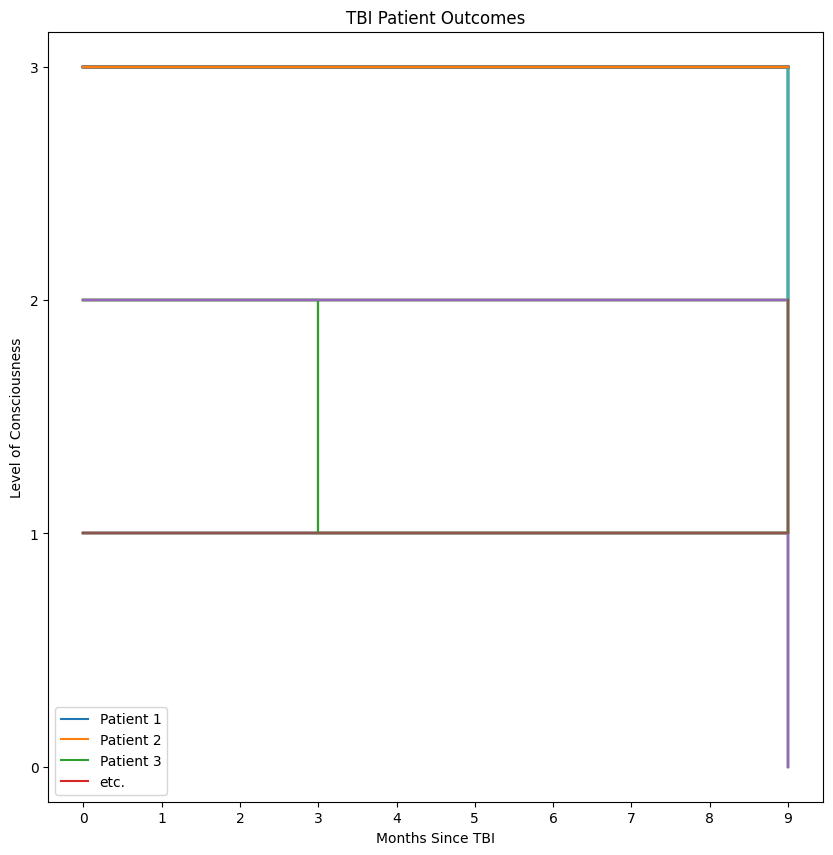

In [24]:
figsize(10, 10)

diagnoses.T.plot(drawstyle='steps-post')
plt.ylabel('Level of Consciousness')
_ = plt.xlabel('Months Since TBI')
_ = plt.title('TBI Patient Outcomes')
_ = plt.legend(['Patient 1', 'Patient 2', 'Patient 3', 'etc.'])
_ = plt.xticks([0,1,2,3,4,5,6,7,8,9])
_ = plt.yticks([0,1,2,3])

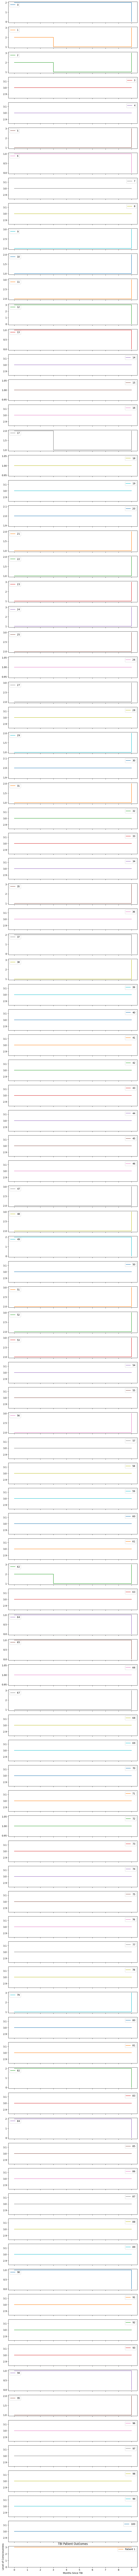

In [25]:
figsize(10, 200)

diagnoses.T.plot(drawstyle='steps-post', subplots=True)
plt.ylabel('Level of Consciousness')
_ = plt.xlabel('Months Since TBI')
_ = plt.title('TBI Patient Outcomes')
_ = plt.legend(['Patient 1', 'Patient 2', 'Patient 3', 'etc.'])
_ = plt.xticks([0,1,2,3,4,5,6,7,8,9])
_ = plt.yticks([0,1,2,3])

## **Conclusion**

From the biostatistics book page 157:

In addition to evaluating a predictor of primary interest [in our case this ended up being CRS-R], it is important to investigate the importance of additional variables that may influence the observed association and therefore alter our inferences about the nature of the relationship. In evaluating the effect of contraceptive use in the first example, it would be clearly important to control for age in addition to behaviors potentially linked to infection risk. In the second example, a number of demographic and clinical variables may be related to both the mortality outcome and treatment regime. Both of these examples are characterized by binary outcomes and multiple predictors, some of which are continuous.

As explained in the paragraph above, I found it prudent to try **multipredictor logistic regressions** and **survival analysis** methods to fit the TBI data. I did not bother with methods discussed in biostatistics book chapter 8 for longitudinal studies because the outcome variable of interest, because the TBI data I'm working with is on a scale of no more than 9 months and therefore relatively short term.

## **I found that CRS-R was the predictor of primary interest for our outcome variable diagnosis, and the other metrics aren't confounders at all!**

## **Future Work**

### **Logistic Regression and Linear Model**

First model. p167: "The logistic regression model for multiple predictor variables is a direct generalization of the version for a single predictor introduced above (6.5). For a binary outcome $y$, and $p$ predictors $x_{1}, x_{2}, \cdots, x_{p}$, the systematic part of the model is defined as follows:
$$
\log \left[\frac{P\left(x_{1}, x_{2}, \cdots, x_{p}\right)}{1-P\left(x_{1}, x_{2}, \cdots, x_{p}\right)}\right]=\beta_{0}+\beta_{1} x_{1}+\beta_{2} x_{2}+\cdots+\beta_{p} x_{p} .
$$

In [26]:
#create the dataframe where we will store our metrics

mymetrics = pd.DataFrame(columns = ['\Beta(95% CI)', 'Log-likelihood', 'P(55)'],
                         index = ['P(x)', 'log[P(x)]',
                                  'log{-log[1-P(x)]}', 'log{P(x)/[1-P(x)]}'])


index = mymetrics.index
index.name = "Models for Decline (P) and Age (x)"

display(mymetrics)


,\Beta(95% CI),Log-likelihood,P(55)
Models for Decline (P) and Age (x),,,
P(x),NaN,NaN,NaN
log[P(x)],NaN,NaN,NaN
log{-log[1-P(x)]},NaN,NaN,NaN
log{P(x)/[1-P(x)]},NaN,NaN,NaN


I will also try the generalized linear model from Chapter 9:

9.1.2 Model for the Mean Response
To begin to write down the model more carefully, define $Y_{i}$ as the number of emergency room visits for patient $i$ and let $E\left[Y_{i}\right]$ represent the average
9.1 Example: Treatment for Depression
293
number of visits for a year. For the moment we will ignore the fact that the observation periods are unequal. The model we are suggesting is
$$
\log E\left[Y_{i}\right]=\beta_{0}+\beta_{1} \mathrm{RACE}_{i}+\beta_{2} \mathrm{TRT}_{i}+\beta_{3} \mathrm{ALCH}_{i}+\beta_{4} \mathrm{DRUG}_{i}
$$
or equivalently (using an exponential, i.e., anti-log)
$$
E\left[Y_{i}\right]=\exp \left\{\beta_{0}+\beta_{1} \mathrm{RACE}_{i}+\beta_{2} \mathrm{TRT}_{i}+\beta_{3} \mathrm{ALCH}_{i}+\beta_{4} \mathrm{DRUG}_{i}\right\}
$$

for which I am analyzing average length of stay in the ICU. I will first try a Gamma distribution because it is flexible distribution for positive, continuous variables that incorporates the assumption that the standard deviation is proportional to the mean (which is likely in this case). Then, I may try a Normal distribution which assumes linearity, just for kicks.

### **Adjusted Cox Model**

We ended up not needing to have an adjusted cox model for our data because there was one clear influencing factor! However, with a different dataset, I could then try an adjusted Cox model as described in 7.2.8 Confounding and 7.2.10 Interaction. And p229: 7.2.11 Adjusted Survival Curves for Comparing Groups, Kaplan–Meier Curves.

In [ ]:
%%R

#Create a Kaplan Meier curve

oldpar <- par(mfrow=c(1,2))
> hist(mgus2$age, nclass=30, main='', xlab="Age")
with(mgus2, tapply(age, sex, mean))
mfit1 <- survfit(Surv(futime, death) ~ sex, data=mgus2)
mfit1
plot(mfit1, col=c(1,2), xscale=12, mark.time=FALSE, lwd=2,
 xlab="Years post diagnosis", ylab="Survival")
legend("topright", c("female", "male"), col=1:2, lwd=2, bty='n')
par(oldpar)

In [ ]:
%%R

#code below creates the necessary 'etime' and 'event' variables, then computes and plots the competing risks estimate.
etime <- with(mgus2, ifelse(pstat==0, futime, ptime))
event <- with(mgus2, ifelse(pstat==0, 2*death, 1))
event <- factor(event, 0:2, labels=c("censor", "pcm", "death"))
table(event)

mfit2 <- survfit(Surv(etime, event) ~ sex, data=mgus2)
print(mfit2, rmean=240, scale=12)

mfit2$transitions
plot(mfit2, col=c(1,2,1,2), lty=c(2,2,1,1),
 mark.time=FALSE, lwd=2, xscale=12,
 xlab="Years post diagnosis", ylab="Probability in State")

legend(240, .6, c("death:female", "death:male", "pcm:female", "pcm:male"),
 col=c(1,2,1,2), lty=c(1,1,2,2), lwd=2, bty='n')

In [ ]:
%%R

#use Kaplan Meier separately for each event type

pcmbad <- survfit(Surv(etime, pstat) ~ sex, data=mgus2)
plot(pcmbad[2], lwd=2, fun="event", conf.int=FALSE, xscale=12,
 xlab="Years post diagnosis", ylab="Fraction with PCM")
lines(mfit2[2,"pcm"], lty=2, lwd=2, mark.time=FALSE, conf.int=FALSE)
legend(0, .25, c("Males, PCM, incorrect curve", "Males, PCM, competing risk"),
 col=1, lwd=2, lty=c(1,2), bty='n')

### **Stratified & Time-Dependent Cox**

as described in p231 7.3.1 and p234 7.3.2.

Again, this ended up not being necessary for my dataset because of the clear influencing factor. However, with a different dataset I could try using a time dependent cox and stratifying data if they do not pass the proportional hazard test!

In [ ]:
%%R

#Stratification

#Computing curves for all the combinations

allfit <- survfit(Surv(Patient.LOS..days., Events) ~ group +
 mydata$Age..yrs. + mydata$Sex, mydata)

temp <- summary(allfit)$table

temp[1:6, c(1,4)] #abbrev printout to fit page

xtime <- seq(0, 14, length=57)*365.25 #four points/year for 14 years
smat <- matrix(0, nrow=57, ncol=3) # survival curves
serr <- smat #matrix of standard errors

In [ ]:
%%R

pi <- with(mydata, table(mydata$Age..yrs., mydata$Sex))/nrow(mydata) #overall dist
for (i in 1:3) {
 temp <- allfit[1:16 + (i-1)*16] #curves for group i
 for (j in 1:16) {
  stemp <- summary(temp[j], times=xtime, extend=T)
  smat[,i] <- smat[,i] + pi[j]*stemp$surv
  serr[,i] <- serr[,i] + pi[j]*stemp$std.err^2
 }
}

serr <- sqrt(serr)
plot(sfit1, lty=2, col=c(1,2,4), xscale=365.25,
 xlab="Years from sample", ylab="Survival")
matlines(xtime, smat, type='l', lwd=2, col=c(1,2,4),lty=1)

In [ ]:
%%R

#To test for overall difference between the curves we can use a
stratified test statistic, which
#is a sum of the test statistics computed within each subgroup.
The most common choice is the
#stratified log-rank statistic which is shown below.
The score test from a stratified Cox model
#would give the same result.

survdiff(Surv(Patient.LOS..days., Events) ~ group +
strata(mydata$Age..yrs., mydata$Sex), mydata))

In [ ]:
%%R

#Modeling: a Stratified Cox Model

cfit4a <- coxph(Surv(Patient.LOS..days., Events) ~
mydata$Age..yrs. + mydata$Sex + strata(group),
 data=mydata)

surv4a <- survfit(cfit4a)

plot(surv4a, col=c(1,2,4), mark.time=F,
 xlab="Years post sample", ylab="Survival")

 tab4a <- with(mydata, table(age, mydata$Sex))

uage <- as.numeric(dimnames(tab4a)[[1]])

tdata <- data.frame(age = uage[row(tab4a)],sex =
c("F","M")[col(tab4a)],count= c(tab4a))

tdata3 <- tdata[rep(1:nrow(tdata), 3),] #three copies

tdata3$group <- factor(rep(1:3, each=nrow(tdata)),labels=levels(mydata$group))

sfit4a <- survexp(~group, data=tdata3, weight = count,ratetable=cfit4a)

plot(sfit4a, mark.time=F, col=c(1,2,4), lty=1, lwd=2,

xlab="Years from Sample",ylab="Survival")

lines(sfit3, mark.time=F, col=c(1,2,4), lty=2, lwd=1)

legend(730,.4, c("FLC low", "FLC med", "FLC high"), lty=1,
col=c(1,2,4),bty='n', lwd=2)

### **Comparison**

Then, I could evaluate each of the Cox models—basic, adjusted, time-dependent, stratified—using the following p240-241:

**Smoothing the Hazard Ratio**

Log-minus-log survival plots are good diagnostic tools for violations of the proportional hazards assumption. To address such a violation, however, we may need more information about how the log-hazard ratio changes with follow-up time. We can do this using a nonparametric, smoothed estimate of the hazard ratio against time, analogous to the LOWESS estimates of the regression function used in diagnosing problems in linear models in Sect 4.7. If the smoothed estimate of the hazard ratio is nearly constant, then the assumption of proportional hazards is approximately satisfied. Conversely, when curvature is pronounced, the shape of the smooth helps us determine how to model the hazard ratio as a function of time.
The method works as follows. As in checking the linear model, the Cox model with all the important predictors is first estimated. Then we obtain scaled Schoenfeld residuals; in Stata this is done using scaledsch option for the stcox command, which generates a residual for each observation and predictor. Then the Schoenfeld residuals for each predictor are smoothed against time using LOWESS, providing a nonparametric estimate of the log hazard ratio for that predictor as it changes over time."

**Schoenfeld Test**

Schoenfeld (1980) provides a test for violation of proportional hazards which is closely related to the diagnostic plot using LOWESS smooths of scaled Schoenfeld residuals just described. The test assesses the correlation between the scaled Schoenfeld residuals and time. This is equivalent to fitting a simple linear regression model with time as the predictor and the residuals as the outcome, and the parametric analog of smoothing the residuals against time using LOWESS. If the hazard ratio is constant, the correlation should be zero."

**Results**

Then, finally, I can compare the accuracy of and evaluate the various logistic regression models, the generalized linear model, and the survival models!

## **Bibliography**

**Book:**
1. Vittinghoff 2005 Regression Methods in Biostatistics

**Papers**
2.	Terry M Therneau, Cynthia S Crowson, Elizabeth J Atkinson, Jan 2015, Adjusted Survival Curves https://cran.r-project.org/web/packages/survival/vignettes/adjcurve.pdf
3.	Lucila Ohno-Machado. Modeling Medical Prognosis: Survival Analysis Techniques. Journal of Biomedical Informatics 34, 428–439 (2001) doi:10.1006/jbin.2002.1038.
4.	Erin Craig, Chenyang Zhong, and Robert Tibshirani. Survival stacking: casting survival analysis as a classification problem. Stanford University July 29, 2021. https://arxiv.org/pdf/2107.13480v1.pdf
5.	Weichi Yao, Halina Frydman, Denis Larocque, and Jeffrey S. Simonoff. LTRCforests: Ensemble Methods for Survival Data with Time-Varying Covariates, 2021. R package version 0.5.5. H˚avard Kvamme, Ørnulf Borgan, and Ida Scheel. Time-to-event prediction with neural networks and Cox regression. arXiv preprint arXiv:1907.00825, 2019.
6.	Stephane Fotso. Deep neural networks for survival analysis based on a multi-task framework. arXiv preprint arXiv:1801.05512, 2018.
7.	Chun-Nam Yu, Russell Greiner, Hsiu-Chin Lin, and Vickie Baracos. Learning patient-specific cancer survival distributions as a sequence of dependent regressors. In Advances in Neural Information Processing Systems 24, pages 1845–1853. Curran Associates, Inc., 2011.
8. Bruschetta R, Tartarisco G, Lucca LF, Leto E, Ursino M, Tonin P, Pioggia G, Cerasa A. Predicting Outcome of Traumatic Brain Injury: Is Machine Learning the Best Way? Biomedicines. 2022; 10(3):686. https://doi.org/10.3390/biomedicines10030686
9. Multilevel Discrete Time Survival Analysis, Tihomir Asparouhov and Bengt Muthén, March 11, 2021



**Code Banks**
10.	Robin Denz Adjusted Survival Curves R package https://github.com/RobinDenz1/adjustedCurves
12.	Egil Martinsson. Weibull Time To Event Recurrent Neural Network. https://github.com/ragulpr/wtte-rnn
12.	Haavard Kvamme. A python package for survival analysis and time-to-event prediction with PyTorch,. https://github.com/havakv/pycox
13.	Cameron Davidson Pilon. Lifelines GitHub: Survival analysis in Python, including Kaplan Meier, Nelson Aalen and regression. https://pypi.org/project/lifelines/
14. Survival analysis in python (KM Estimate, Cox-PH and AFT Model), Rahul Raoniar, Published in
The Researchers’ Guide, https://medium.com/the-researchers-guide/survival-analysis-in-python-km-estimate-cox-ph-and-aft-model-5533843c5d5d
15. Intro to Discrete-Time Survival Analysis in R Qixiang Fang and Rens van de Schoot, Last modified: date: 14 October 2019, https://www.rensvandeschoot.com/tutorials/discrete-time-survival/
16. RESEARCH IN PYTHON: Discrete Time Survival Analysis
by J. Nathan Matias, April 4, 2015, https://github.com/natematias/research_in_python/blob/master/survival_analysis/Discrete%20Time%20Survival%20Analysis%20in%20Python.ipynb


